In [1]:
# !pip install ghostscript

In [2]:
!python.exe -m pip install --upgrade pip

# Paquetes necesarios
!pip install 'camelot-py[base]'
!pip install 'camelot-py[cv]' -q
!pip install 'PyPDF2<3.0'

In [3]:
import pandas as pd
import camelot
import matplotlib.pyplot as plt

In [4]:
archivo = '../data_set/PDF/Analisis Anual 2018 ETAS.pdf'
tabla = camelot.read_pdf(archivo, pages = '3')
tabla[0].df

,0,1,2,3,4
0,AREA DE SALUD,2017,,2018,
1,,Casos,Tasas,Casos,Tasas
2,Ixcán \nSan Marcos \nIxil \nChiquimula \nSanta...,12777 \n64916 \n16229 \n25517 \n22257,10747.00 \n5531.76 \n8131.17 \n5995.79 \n5698.26,15484 \n83219 \n14009 \n28873 \n25857,12559.72 \n6937.18 \n6775.49 \n6629.64 \n6485.10
3,Zacapa \nHuehuetenango \nPetén Sur Occidental ...,13467 \n85754 \n14539 \n10657 \n15657 \n22885 ...,5499.70 \n6443.15 \n4960.76 \n4312.31 \n4504.7...,16111 \n87211 \n18107 \n14694 \n19647 \n32402 ...,6464.70 \n6409.30 \n5980.51 \n5787.55 \n5533.6...
4,Total País,662901,3914.98,756338,4369.10


In [5]:
area = list(map(lambda area: area.strip(), tabla[0].df[0][2].split('\n')))
area.extend(list(map(lambda area: area.strip(), tabla[0].df[0][3].split('\n'))))
area

['Ixcán',
 'San Marcos',
 'Ixil',
 'Chiquimula',
 'Santa Rosa',
 'Zacapa',
 'Huehuetenango',
 'Petén Sur Occidental',
 'Petén Sur Oriental',
 'Retalhuleu',
 'Totonicapán',
 'Escuintla',
 'Sololá',
 'Baja Verapaz',
 'Jutiapa',
 'El Progreso',
 'El Quiche',
 'Quetzaltenango',
 'Alta Verapaz',
 'Jalapa',
 'Petén Norte',
 'Sacatepéquez',
 'Chimaltenango',
 'Izabal',
 'Suchitepéquez',
 'Guatemala Central',
 'Guatemala Nor Occidente',
 'Guatemala Nor Oriente',
 'Guatemala Sur']

In [6]:
casos2017 = [int(casos.strip())for casos in tabla[0].df[1][2].split('\n')]
casos2017.extend([int(casos.strip())for casos in tabla[0].df[1][3].split('\n')])

casos2018 = [int(casos.strip())for casos in tabla[0].df[3][2].split('\n')]
casos2018.extend([int(casos.strip())for casos in tabla[0].df[3][3].split('\n')])

In [7]:
tasas2017 = [float(casos.strip())for casos in tabla[0].df[2][2].split('\n')]
tasas2017.extend([float(casos.strip())for casos in tabla[0].df[2][3].split('\n')])

tasas2018 = [float(casos.strip())for casos in tabla[0].df[4][2].split('\n')]
tasas2018.extend([float(casos.strip())for casos in tabla[0].df[4][3].split('\n')])

In [8]:
etas = pd.DataFrame(area, columns=['Area de Salud'])
etas['Casos 2017'] = casos2017
etas['Tasas 2017'] = tasas2017
etas['Casos 2018'] = casos2018
etas['Tasas 2017'] = tasas2018
etas

,Area de Salud,Casos 2017,Tasas 2017,Casos 2018
0,Ixcán,12777,12559.72,15484
1,San Marcos,64916,6937.18,83219
2,Ixil,16229,6775.49,14009
3,Chiquimula,25517,6629.64,28873
4,Santa Rosa,22257,6485.10,25857
5,Zacapa,13467,6464.70,16111
6,Huehuetenango,85754,6409.30,87211
7,Petén Sur Occidental,14539,5980.51,18107
8,Petén Sur Oriental,10657,5787.55,14694
9,Retalhuleu,15657,5533.66,19647


In [9]:
etas.describe()

,Casos 2017,Tasas 2017,Casos 2018
count,29.000000,29.000000,29.000000
mean,22858.655172,4782.187931,26080.620690
std,17573.564154,2284.237179,20209.094508
min,7520.000000,1416.070000,8345.000000
25%,12777.000000,3233.510000,14370.000000
50%,16229.000000,5165.630000,18107.000000
75%,22885.000000,5980.510000,28873.000000
max,85754.000000,12559.720000,87211.000000


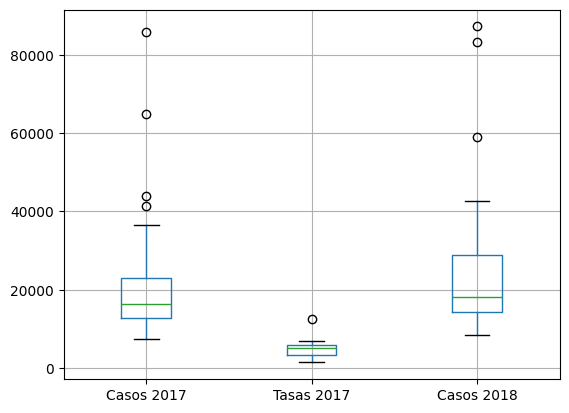

In [10]:
etas.boxplot();

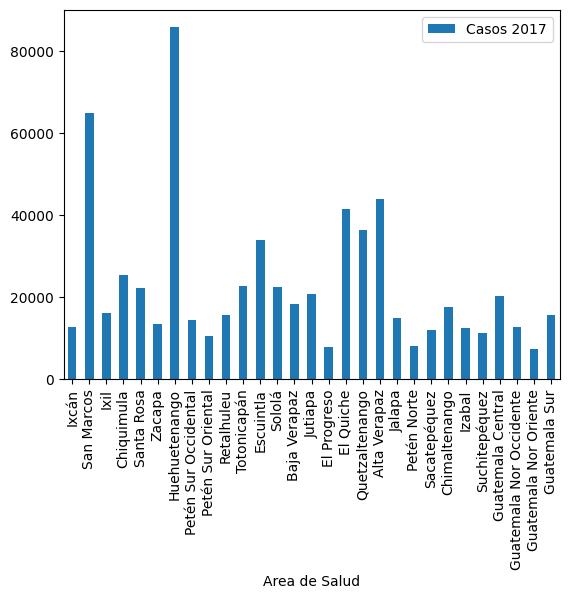

In [11]:
etas.plot(x ='Area de Salud', y = 'Casos 2017', kind='bar')
plt.show()          

In [12]:
tabla5 = camelot.read_pdf(archivo, pages = '10')
tabla5[0].df

,0,1,2,3,4
0,AREA DE SALUD,2017,,2018,
1,,Casos,Tasas,Casos,Tasas
2,Suchitepéquez \nHuehuetenango \nSanta Rosa \nR...,1 \n41 \n34 \n0 \n0,0.17 \n3.08 \n8.70,49 \n74 \n18 \n8 \n7,8.03 \n5.44 \n4.51 \n2.25 \n2.17
3,Totonicapán \nSacatepéquez \nIxcán \nEscuintla...,1 \n2 \n0 \n3 \n0 \n19 \n1 \n3 \n2 \n0 \n3 \n4...,0.18 \n0.56 \n \n0.38 \n \n1.91 \n0.21 \n0.5...,10 \n6 \n2 \n12 \n3 \n7 \n2 \n1 \n2 \n1 \n1 \n1,1.71 \n1.65 \n1.62 \n1.49 \n1.20 \n0.70 \n0.41...
4,Total PAIS,215,1.27,204,1.18


In [13]:
area2 = list(map(lambda area2: area2.strip(), tabla5[0].df[0][2].split('\n')))
area2.extend(list(map(lambda area2: area2.strip(), tabla5[0].df[0][3].split('\n'))))
area2

['Suchitepéquez',
 'Huehuetenango',
 'Santa Rosa',
 'Retalhuleu',
 'Baja Verapaz',
 'Totonicapán',
 'Sacatepéquez',
 'Ixcán',
 'Escuintla',
 'Zacapa',
 'Guatemala Central',
 'Izabal',
 'Sololá',
 'Guatemala Sur',
 'Guatemala Nor Occidente',
 'El Quiche',
 'San Marcos',
 'Alta Verapaz',
 'Guatemala Nor Oriente',
 'Jalapa',
 'Petén Sur Occidental',
 'Petén Sur Oriental']

In [45]:
casos2017 = [int(casos.strip()) for casos in tabla5[0].df[1][2].split('\n')]
casos2017.extend([int(casos.strip()) for casos in tabla5[0].df[1][3].split('\n')])

tasas2017 = [float(tasas.strip()) if tasas.strip() else 0 for tasas in tabla5[0].df[2][2].split('\n')]
tasas2017.extend([0,0])
tasas2017.extend([float(tasas.strip()) if tasas.strip() else 0 for tasas in tabla5[0].df[2][3].split('\n')])

casos2018 = [int(casos.strip()) for casos in tabla5[0].df[3][2].split('\n')]
casos2018.extend([int(casos.strip()) for casos in tabla5[0].df[3][3].split('\n')])
casos2018.extend([0]*5)

tasas2018 = [float(tasas.strip()) if tasas.strip() else 0 for tasas in tabla5[0].df[4][2].split('\n')]
tasas2018.extend([float(tasas.strip()) if tasas.strip() else 0 for tasas in tabla5[0].df[4][3].split('\n')])
tasas2018.extend([0]*5)

In [46]:
etas = pd.DataFrame(area2, columns=['Area de Salud'])
etas['Casos 2017'] = casos2017
etas['Tasas 2017'] = tasas2017
etas['Casos 2018'] = casos2018
etas['Tasas 2018'] = tasas2018
etas

,Area de Salud,Casos 2017,Tasas 2017,Casos 2018,Tasas 2018
0,Suchitepéquez,1,0.17,49,8.03
1,Huehuetenango,41,3.08,74,5.44
2,Santa Rosa,34,8.70,18,4.51
3,Retalhuleu,0,0.00,8,2.25
4,Baja Verapaz,0,0.00,7,2.17
5,Totonicapán,1,0.18,10,1.71
6,Sacatepéquez,2,0.56,6,1.65
7,Ixcán,0,0.00,2,1.62
8,Escuintla,3,0.38,12,1.49
9,Zacapa,0,0.00,3,1.20


In [59]:
tabla3 = camelot.read_pdf(archivo, pages='5', flavor='stream')
print(len(tabla3))
tabla3[0].df

2


,0,1,2,3,4,5
0,,,Cuadro 3. ETA´s: Total de brotes reportados en...,,,
1,No.,SE,Área de Salud,ETA reportada,Fuente de Contagio,No. De casos
2,,,Guate Noroccidente/,,,
3,1,4,,Intoxicación Alimentaria,Pan con Pollo,135
4,,,Guate Central,,,
5,2,4,Peten Norte,Intoxicación Alimentaria,envuelto de coliflor,20
6,3,6,Quetzaltenango,Rotavirus,,17
7,4,6,Jalapa,Intoxicación Alimentaria,envuelto de Ejote,4
8,5,7,Quetzaltenango,Intoxicación Alimentaria,carne azada,28
9,6,15,Alta Verapaz,Intoxicación Alimentaria,caldo de pollo,23


In [64]:
No = tabla3[0].df[0].iloc[2:].astype(str).str.strip()
No = [int(num) if num.isdigit() else ' ' for num in No]
etas = pd.DataFrame(No, columns=['NO'])
etas


,NO
0,
1,1
2,
3,2
4,3
5,4
6,5
7,6
8,7
9,8


In [76]:
SE = tabla3[0].df[1].iloc[2:].astype(str).str.strip()
SE = [int(num) if num.isdigit() else ' ' for num in SE]
area3 = tabla3[0].df[2].iloc[2:].astype(str).str.strip()
eta_reportada = tabla3[0].df[3].iloc[2:].astype(str).str.strip()
fuente_contagio = tabla3[0].df[4].iloc[2:].astype(str).str.strip()
casos = tabla3[0].df[5].iloc[2:].astype(str).str.strip()
casos = [int(caso) if caso.isdigit() else ' ' for caso in casos]

etas['SE'] = SE
etas['Area de Salud'] = area3.reset_index(drop=True)
etas['ETA reportada'] = eta_reportada.reset_index(drop=True)
etas['Fuente de contagio'] = fuente_contagio.reset_index(drop=True)
etas['No. De Casos'] = casos

etas

,NO,SE,Area de Salud,ETA reportada,Fuente de contagio,No. De Casos
0,,,Guate Noroccidente/,,,
1,1,4,,Intoxicación Alimentaria,Pan con Pollo,135
2,,,Guate Central,,,
3,2,4,Peten Norte,Intoxicación Alimentaria,envuelto de coliflor,20
4,3,6,Quetzaltenango,Rotavirus,,17
5,4,6,Jalapa,Intoxicación Alimentaria,envuelto de Ejote,4
6,5,7,Quetzaltenango,Intoxicación Alimentaria,carne azada,28
7,6,15,Alta Verapaz,Intoxicación Alimentaria,caldo de pollo,23
8,7,15,Huehuetenango,Enfermedad Diarreica,agua contaminada,39
9,8,18,Chiquimula,Intoxicación Alimentaria,Hot Dog,5
